In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(-5.5949495989593885, -46.71464992627213), (81.35187670348395, -82.74848118716521), (-25.397653622045524, -76.65001521387063), (12.80253722313114, 109.11123568343464), (36.61572787550183, -106.852085087824), (78.57688884347775, -96.61638758549248), (79.31750472221489, 16.73860153728893), (-76.67908678358361, 101.84818379215773), (27.538369722789582, 8.405553647517223), (60.93540178609743, -79.84011330139626), (-19.541952683781588, 129.40462600209122), (-49.12566188024987, 74.70976213827436), (-26.926039583076957, -108.09606832152728), (-49.19959600917928, 85.67419322166535), (-25.082519788035896, 115.27203321377436), (46.750574727520274, 55.340744603229496), (-80.85296557775982, -50.04416734952562), (70.83284537190195, 19.60295385772244), (-30.692218595517097, -84.2431832775207), (31.907436656561202, -165.103719005317), (-24.767088870423123, 69.81640676695946), (-14.864258069219943, 158.7326385326224), (-78.22280749117954, 115.46290113422754), (55.68767327953324, -110.71226916459845),

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ac5b64b5036e1a76e78a65df55dd61a


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | amarante do maranhao
Processing Record 2 of Set 13 | qaanaaq
Processing Record 3 of Set 13 | taltal
Processing Record 4 of Set 13 | tuy hoa
Processing Record 5 of Set 13 | los alamos
Processing Record 6 of Set 13 | thompson
Processing Record 7 of Set 13 | longyearbyen
Processing Record 8 of Set 13 | albany
Processing Record 9 of Set 13 | gat
Processing Record 10 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 13 | kununurra
Processing Record 12 of Set 13 | mahebourg
Processing Record 13 of Set 13 | rikitea
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | carnarvon
Processing Record 16 of Set 13 | beyneu
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | tromso
Processing Record 19 of Set 13 | talcahuano
Processing Record 20 of Set 13 | kapaa
Processing Record 21 of Set 13 | bambous virieux
Processing Record 22 of Set 13 | kirakira
Processing Record 23 of Set 13 | grand cen

Processing Record 36 of Set 16 | shingu
Processing Record 37 of Set 16 | yulara
Processing Record 38 of Set 16 | karratha
Processing Record 39 of Set 16 | mecca
Processing Record 40 of Set 16 | dalbandin
Processing Record 41 of Set 16 | khonuu
City not found. Skipping...
Processing Record 42 of Set 16 | lincoln
Processing Record 43 of Set 16 | tessalit
Processing Record 44 of Set 16 | wewak
Processing Record 45 of Set 16 | colares
Processing Record 46 of Set 16 | kruisfontein
Processing Record 47 of Set 16 | joanopolis
Processing Record 48 of Set 16 | tukrah
Processing Record 49 of Set 16 | los llanos de aridane
Processing Record 50 of Set 16 | kharan
Processing Record 1 of Set 17 | camacha
Processing Record 2 of Set 17 | elko
Processing Record 3 of Set 17 | hilo
Processing Record 4 of Set 17 | marcona
City not found. Skipping...
Processing Record 5 of Set 17 | oranjemund
Processing Record 6 of Set 17 | hasaki
Processing Record 7 of Set 17 | ponta do sol
Processing Record 8 of Set 17 |

Processing Record 25 of Set 20 | mareeba
Processing Record 26 of Set 20 | cap malheureux
Processing Record 27 of Set 20 | villa carlos paz
Processing Record 28 of Set 20 | chagda
City not found. Skipping...
Processing Record 29 of Set 20 | gilbues
Processing Record 30 of Set 20 | port elizabeth
Processing Record 31 of Set 20 | bousso
Processing Record 32 of Set 20 | san carlos
Processing Record 33 of Set 20 | bijar
Processing Record 34 of Set 20 | shiloh
Processing Record 35 of Set 20 | neyshabur
Processing Record 36 of Set 20 | ixtapa
Processing Record 37 of Set 20 | calabozo
Processing Record 38 of Set 20 | ahipara
Processing Record 39 of Set 20 | santa comba
Processing Record 40 of Set 20 | bayangol
Processing Record 41 of Set 20 | vestmanna
Processing Record 42 of Set 20 | halalo
City not found. Skipping...
Processing Record 43 of Set 20 | inhambane
Processing Record 44 of Set 20 | shevchenkove
Processing Record 45 of Set 20 | sawtell
Processing Record 46 of Set 20 | faya
Processin

Processing Record 9 of Set 24 | niort
Processing Record 10 of Set 24 | ahtopol
Processing Record 11 of Set 24 | hami
Processing Record 12 of Set 24 | rolim de moura
City not found. Skipping...
Processing Record 13 of Set 24 | chinna salem
Processing Record 14 of Set 24 | cervo
Processing Record 15 of Set 24 | severobaykalsk
Processing Record 16 of Set 24 | darnah
Processing Record 17 of Set 24 | ust-ishim
Processing Record 18 of Set 24 | ohaba lunga
City not found. Skipping...
Processing Record 19 of Set 24 | bucerias
Processing Record 20 of Set 24 | kapoeta
Processing Record 21 of Set 24 | mahibadhoo
Processing Record 22 of Set 24 | japura
Processing Record 23 of Set 24 | ichinohe
Processing Record 24 of Set 24 | artyk
City not found. Skipping...
Processing Record 25 of Set 24 | pangnirtung
Processing Record 26 of Set 24 | richards bay
Processing Record 27 of Set 24 | ozinki
Processing Record 28 of Set 24 | hit
Processing Record 29 of Set 24 | muhlheim
City not found. Skipping...
Proc

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Amarante Do Maranhao,-5.5667,-46.7422,84.69,57,74,5.21,BR,2022-05-27 19:20:15
1,Qaanaaq,77.4840,-69.3632,23.67,87,100,13.73,GL,2022-05-27 19:14:46
2,Taltal,-25.4000,-70.4833,65.25,66,35,6.31,CL,2022-05-27 19:16:17
3,Tuy Hoa,13.0833,109.3000,78.89,75,100,10.78,VN,2022-05-27 19:20:15
4,Los Alamos,35.8881,-106.3070,86.68,9,0,13.80,US,2022-05-27 19:20:16
5,Thompson,55.7435,-97.8558,55.98,36,6,5.32,CA,2022-05-27 19:11:48
6,Longyearbyen,78.2186,15.6401,44.44,76,0,8.05,SJ,2022-05-27 19:20:16
7,Albany,42.6001,-73.9662,77.23,74,100,10.40,US,2022-05-27 19:17:24
8,Gat,31.6100,34.7642,82.40,100,1,5.66,IL,2022-05-27 19:20:17
9,Kununurra,-15.7667,128.7333,58.98,88,99,0.00,AU,2022-05-27 19:20:17


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
(city_data_df).head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amarante Do Maranhao,BR,2022-05-27 19:20:15,-5.5667,-46.7422,84.69,57,74,5.21
1,Qaanaaq,GL,2022-05-27 19:14:46,77.4840,-69.3632,23.67,87,100,13.73
2,Taltal,CL,2022-05-27 19:16:17,-25.4000,-70.4833,65.25,66,35,6.31
3,Tuy Hoa,VN,2022-05-27 19:20:15,13.0833,109.3000,78.89,75,100,10.78
4,Los Alamos,US,2022-05-27 19:20:16,35.8881,-106.3070,86.68,9,0,13.80
5,Thompson,CA,2022-05-27 19:11:48,55.7435,-97.8558,55.98,36,6,5.32
6,Longyearbyen,SJ,2022-05-27 19:20:16,78.2186,15.6401,44.44,76,0,8.05
7,Albany,US,2022-05-27 19:17:24,42.6001,-73.9662,77.23,74,100,10.40
8,Gat,IL,2022-05-27 19:20:17,31.6100,34.7642,82.40,100,1,5.66
9,Kununurra,AU,2022-05-27 19:20:17,-15.7667,128.7333,58.98,88,99,0.00


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1653705333.837455

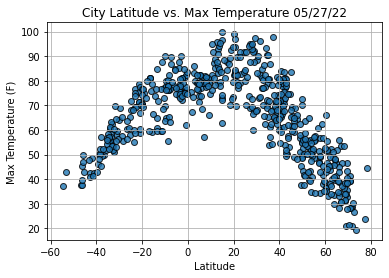

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

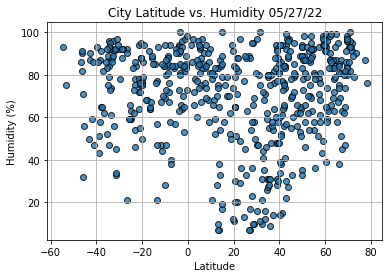

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

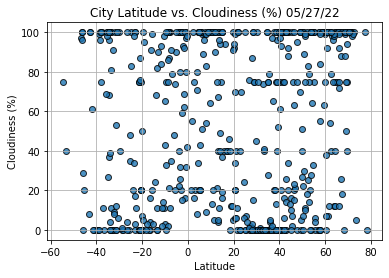

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()